<a href="https://colab.research.google.com/github/dothihong14/BTL_AI_Nhom9/blob/main/BTL_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Kết nối google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
duong_dan_anh_train="/content/drive/MyDrive/Acne/Train"
duong_dan_anh_valid="/content/drive/MyDrive/Acne/Validation"

In [ ]:
# Gán nhãn
label=['Acne', 'Clear', 'Comedo']

In [ ]:
# Tiền xử lý dữ liệu
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255) #rescale: chuẩn hóa dữ liệu về [0;1]
valid_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_data = train_data_gen.flow_from_directory(
    duong_dan_anh_train,        # Đường dẫn tới ảnh huấn luyện
    target_size=(50, 50),          # Biến đổi các ảnh huấn luyện về cùng một kích thước
    batch_size=32,
    class_mode='categorical'       # Phân loại ảnh đa nhãn
)

valid_data = valid_data_gen.flow_from_directory(
    duong_dan_anh_valid,        # Đường dẫn tới ảnh kiểm tra
    target_size=(50, 50),
    batch_size=32,
    class_mode='categorical'
)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = Sequential()

# lớp CNN1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D((2, 2)))

# lớp CNN2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())

# lớp ẩn
model.add(Dense(512, activation='relu'))

# lớp output
model.add(Dense(3, activation='softmax'))  # 3 đầu ra


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=["acc"])

In [ ]:
EPOCHS=100
history=model.fit(
    train_data,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data = valid_data,
    validation_steps=2)

Epoch 1/100
2/2 [==============================] - 18s 2s/step - loss: 3.0269 - acc: 0.2500 - val_loss: 2.4275 - val_acc: 0.4531
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 1.7444 - acc: 0.4531 - val_loss: 0.9849 - val_acc: 0.5000
Epoch 3/100
2/2 [==============================] - 3s 2s/step - loss: 1.0939 - acc: 0.3594 - val_loss: 0.9745 - val_acc: 0.4375
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 0.9890 - acc: 0.5312 - val_loss: 1.0568 - val_acc: 0.3438
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 1.0395 - acc: 0.5000 - val_loss: 0.9036 - val_acc: 0.6875
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 0.8898 - acc: 0.6562 - val_loss: 0.8769 - val_acc: 0.7969
Epoch 7/100
2/2 [==============================] - 2s 2s/step - loss: 0.7273 - acc: 0.8594 - val_loss: 1.5075 - val_acc: 0.4219
Epoch 8/100
2/2 [==============================] - 2s 1s/step - loss: 0.9337 - acc: 0.6406 - val_loss: 

In [ ]:
#Acne
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])


TypeError: 'NoneType' object is not subscriptable

Saving levle0_88_jpg.rf.4693b4c9a9a0412ea7b5f481710a51c3.jpg to levle0_88_jpg.rf.4693b4c9a9a0412ea7b5f481710a51c3.jpg
1/1 [==============================] - 0s 30ms/step
[[0. 1. 0.]]
Giá trị dự đoán:  Clear


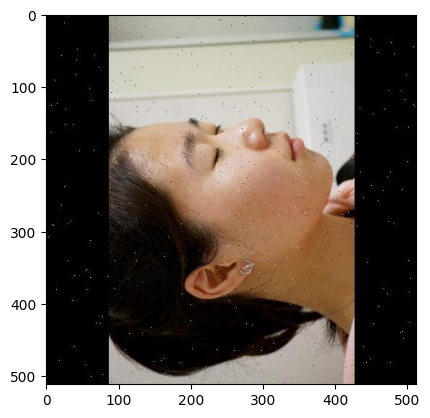

In [ ]:
#Clear
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

Saving blackhead_581_jpg.rf.7f8bc5f86761d37c79eae947296b3e69.jpg to blackhead_581_jpg.rf.7f8bc5f86761d37c79eae947296b3e69.jpg


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 200, 200, 3), found shape=(None, 50, 50, 3)


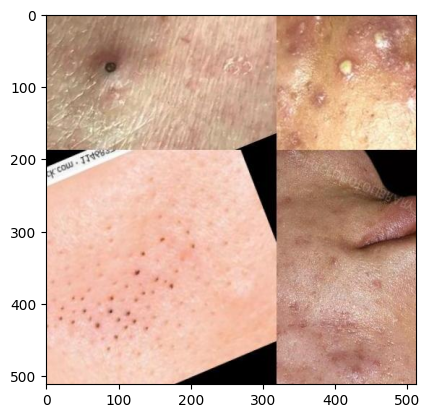

In [ ]:
#
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

In [ ]:
#Kịch bản 2 thay đổi kích cỡ của ảnh lên 200*200

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = Sequential()

# lớp CNN1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# lớp CNN2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())

# lớp ẩn
model.add(Dense(512, activation='relu'))

# lớp output
model.add(Dense(3, activation='softmax'))  # 3 đầu ra

In [ ]:
EPOCHS=100
history=model.fit(
    train_data,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data = valid_data,
    validation_steps=2)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
#Acne
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])


In [ ]:
#Clear
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])


In [ ]:
#Comedo
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])


Việc tăng kích thước từ 50*50 lên 200*200 giúp các output dự đoán chính xác hơn, nhưng đồng thời làm cho kích cỡ ảnh trở nên lớn hơn

In [ ]:
#Kịch bản 3 nâng kích thước bộ ảnh lên 100*100 và thêm 1 lớp CNN thứ 3

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = Sequential()

# lớp CNN1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

# lớp CNN2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# lớp CNN3
model.add(Conv2D(120, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())

# lớp ẩn
model.add(Dense(512, activation='relu'))

# lớp output
model.add(Dense(3, activation='softmax'))  # 3 đầu ra

In [ ]:
EPOCHS=100
history=model.fit(
    train_data,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data = valid_data,
    validation_steps=2)

In [ ]:
#Acne
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])


In [ ]:
#Clear
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])


In [ ]:
#Comedo
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])



In [ ]:
#Kịch bản 4: thay đổi tham số để huấn luyện mô hình
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=["acc"])

In [ ]:
EPOCHS=100
history=model.fit(
    train_data,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data = valid_data,
    validation_steps=2)

In [ ]:
#Acne
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

In [ ]:
#Clear
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

In [ ]:
#Comedo
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

In [ ]:
#Kịch bản 5: thay đổi số vòng lặp
EPOCHS=200
history=model.fit(
    train_data,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data = valid_data,
    validation_steps=2)

Epoch 1/200
2/2 [==============================] - 2s 2s/step - loss: 0.2893 - acc: 0.9062 - val_loss: 0.2123 - val_acc: 0.8906
Epoch 2/200
2/2 [==============================] - 2s 2s/step - loss: 0.2550 - acc: 0.9000 - val_loss: 0.1641 - val_acc: 0.9062
Epoch 3/200
2/2 [==============================] - 3s 2s/step - loss: 0.1471 - acc: 0.9375 - val_loss: 0.2269 - val_acc: 0.8438
Epoch 4/200
2/2 [==============================] - 2s 2s/step - loss: 0.2461 - acc: 0.8438 - val_loss: 0.2378 - val_acc: 0.8906
Epoch 5/200
2/2 [==============================] - 2s 1s/step - loss: 0.3513 - acc: 0.7656 - val_loss: 0.1819 - val_acc: 0.9375
Epoch 6/200
2/2 [==============================] - 2s 1s/step - loss: 0.1853 - acc: 0.9062 - val_loss: 0.2466 - val_acc: 0.8750
Epoch 7/200
2/2 [==============================] - 2s 2s/step - loss: 0.1781 - acc: 0.9219 - val_loss: 0.1823 - val_acc: 0.9062
Epoch 8/200
2/2 [==============================] - 2s 2s/step - loss: 0.1066 - acc: 0.9688 - val_loss: 0

Saving levle0_97_jpg.rf.5c90421f1ec791a6e69d2f28e988da94.jpg to levle0_97_jpg.rf.5c90421f1ec791a6e69d2f28e988da94.jpg
1/1 [==============================] - 0s 104ms/step
[[1. 0. 0.]]
Giá trị dự đoán:  Acne


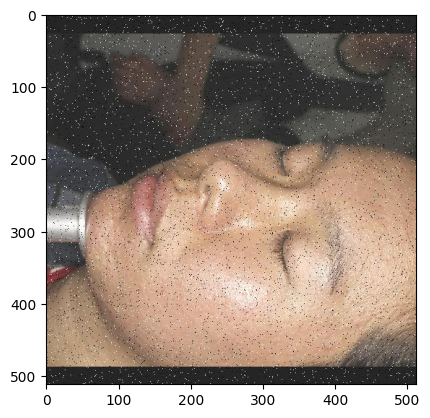

In [ ]:
#Ance
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

Saving Abdullah_Gul_0017.jpg to Abdullah_Gul_0017.jpg
1/1 [==============================] - 0s 27ms/step
[[0. 1. 0.]]
Giá trị dự đoán:  Clear


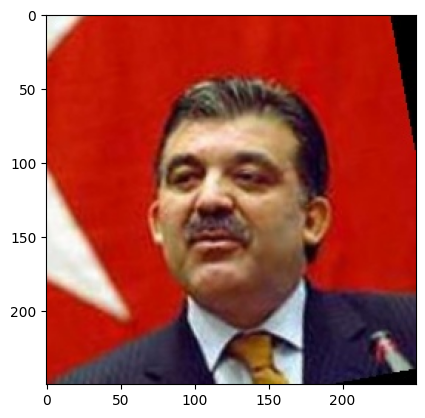

In [ ]:
#Clear
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

In [ ]:
#Comedo
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

anh_upload = files.upload()

for anh in anh_upload.keys():
    # ảnh dự đoán
    path = '/content/' + anh
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)
    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

In [ ]:
#Kịch bản 6 kết hợp các kịch bản trên